# Big Data (UNT) -  2024

## Trabajo Práctico 2 

### Fecha de entrega:
Jueves 26 de septiembre a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado **“Entrega final del tp”**. 
- Asegurense de haber creado una carpeta llamada TP2. Deben entregar un reporte (pdf) y el código (jupyter notebook). Ambos deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- en el canal de Slack **#tp-entregas**.
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el mensaje en el canal de Slack **#tp-entregas** hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el mensaje en el canal **#tp-entregas** y me tageen (@marianr2).
    - No hagan nuevos <i>push</i> después de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [7]:
# Resolución:
import pandas as pd

import os
os.getcwd() # Ver donde estamos ubicados
# os.chdir("") # Comando para corregir la ubicación del archivo

# Abrimos el archivo y vemos las estructura de los datos
df = pd.read_csv("base_airbnb_ny.csv")
#print(df) #con este comando damos una primera mirada al data frame

#Estructura general de la base de datos
print('Cantidad de filas:', len(df))
print('Cantidad de columnas:', len(df.columns))


Cantidad de filas: 48905
Cantidad de columnas: 16


In [8]:
# Observamos las características de las 16 variables
df.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48905 entries, 0 to 48904
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48905 non-null  int64  
 1   name                            48889 non-null  object 
 2   host_id                         48905 non-null  int64  
 3   host_name                       48884 non-null  object 
 4   neighbourhood_group             48905 non-null  object 
 5   neighbourhood                   48905 non-null  object 
 6   latitude                        48905 non-null  float64
 7   longitude                       48905 non-null  float64
 8   room_type                       48905 non-null  object 
 9   price                           48890 non-null  float64
 10  minimum_nights                  48905 non-null  int64  
 11  number_of_reviews               48905 non-null  int64  
 12  last_review                     

In [11]:
#Sobreescribimos la base datos, eliminando duplicados según el ID de los anuncios en Airbnb
df = df.drop_duplicates(subset='id')

print('Nueva cantidad de filas sin duplicados:', len(df))

#Pasamos de tener 48905 observaciones a 48895. Es decir, nuestra base original tenia 10 anuncios duplicados.

Nueva cantidad de filas sin duplicados: 48895


In [13]:
#Sobreescribimos nuevamente nuestro dataframe, eliminando columnas que no aportan información relevante para esta tarea.
#Consideramos pertinente eliminar las variables de nombre de la publicación y nombre del host. 

df=df.drop(["name", "host_name"], axis=1) 
print('Nueva cantidad de columnas:', len(df.columns))

Nueva cantidad de columnas: 14


In [15]:
# Contamos cuántos missing values tenemos por columna
missing_values = df.isnull().sum()
print(missing_values)

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                15
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [17]:
# Investigamos sobre los 10052 missing en last_review y reviews_per_month
# La hipótesis es que cuando number_of_reviews es cero, estas dos variables son missing.

# Crear una máscara para verificar las condiciones
missing_check = df['last_review'].isnull() & df['reviews_per_month'].isnull() & (df['number_of_reviews'] == 0)

# Filtrar el DataFrame para obtener las filas que cumplen con la condición
resultados = df[missing_check]
print("Las observaciones que cumplen con la condición son:\n",resultados.shape[0])


Las observaciones que cumplen con la condición son:
 10052


In [19]:
# La hipótesis de que los missings se genera porque el anuncio no tiene ninguna review se cumple. 
# Por lo tanto, reemplazamos los missing values de reviews_per_month por cero, y dejamos los missings de last_review (los datos son fechas).
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


In [21]:
# Missings de precios: #Precios cero BORRAR valores sin sentido


# Revisamos el número de missing values luego de las imputaciones
missing_values = df.isnull().sum()
print(missing_values)

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                15
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64


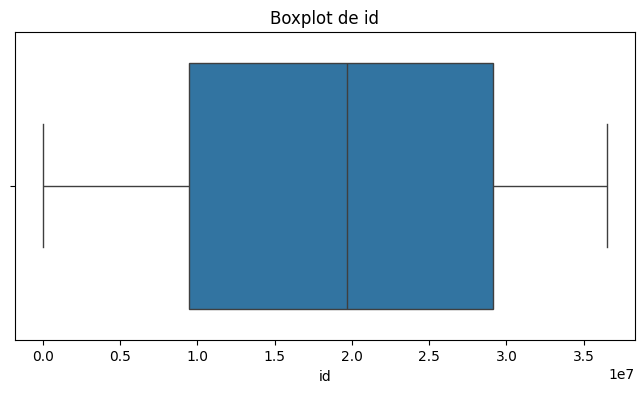

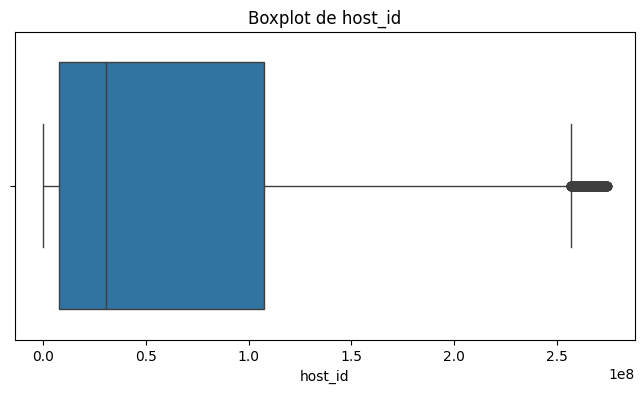

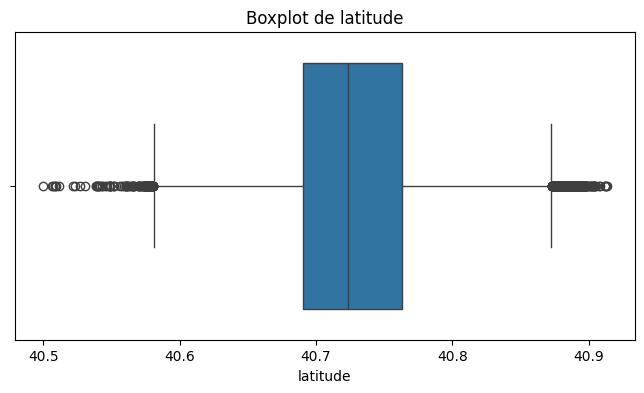

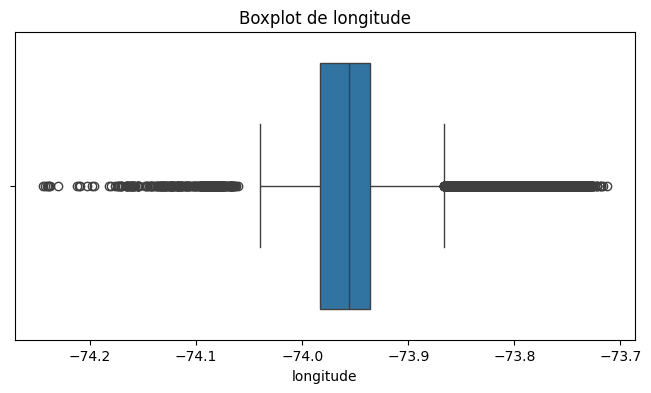

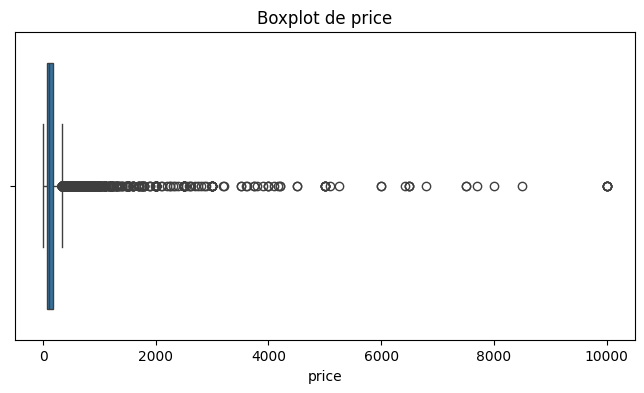

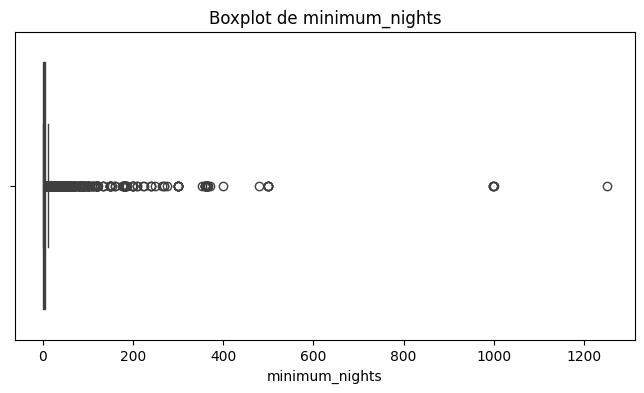

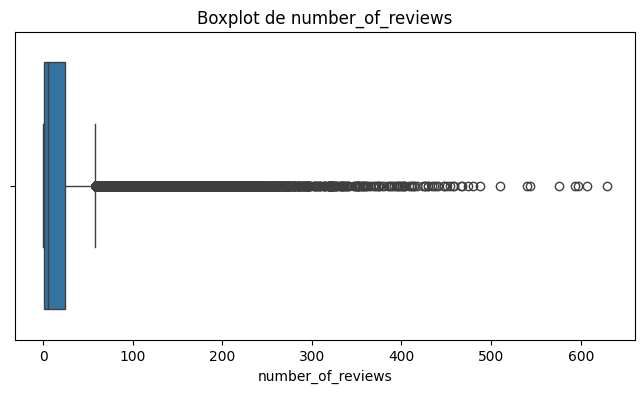

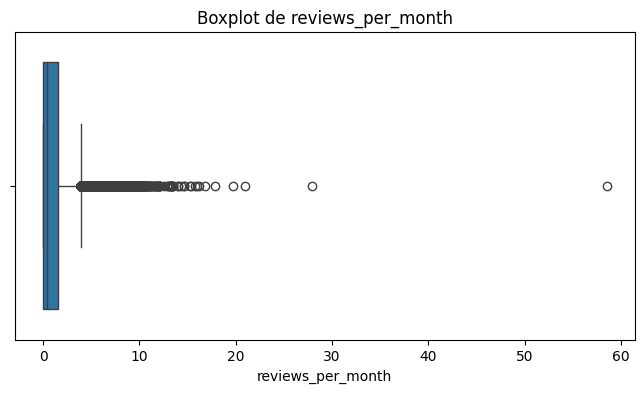

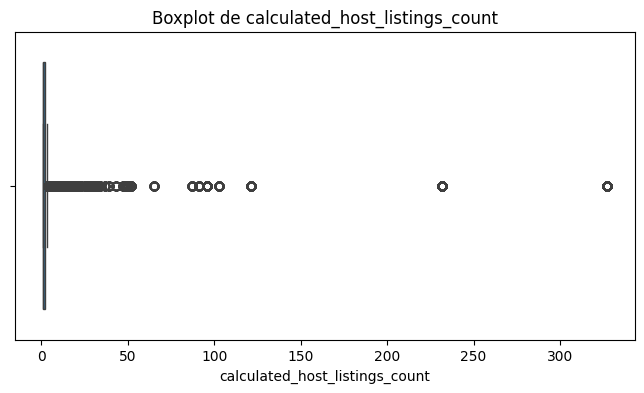

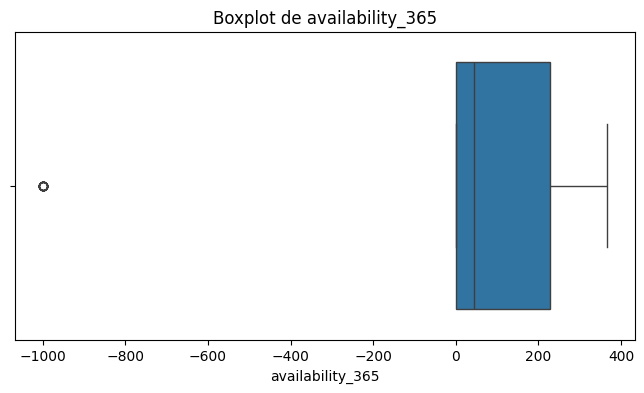

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para cada columna numérica para visualizar outliers
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

In [24]:
#### Outliers o valores que no tienen sentido

# Para la variable availability_365 filtramos los valores mayores a cero. Eliminamos un dato de -1000 sin sentido.
df = df[df['availability_365'] > 0]

# Para las siguientes varaibles numéricas, tomamos el criterio de 2 desviaciones estándar de la media para filtrar los outliers
for col in ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count']:
    mean_values = df[col].mean()
    std_dev_values = df[col].std()

    lower_bound = mean_values - 2 * std_dev_values
    upper_bound = mean_values + 2 * std_dev_values

   # Filtrar el DataFrame manteniendo solo los valores dentro de los límites
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


# DataFrame filtrado
#print("DataFrame filtrado:\n", df)  

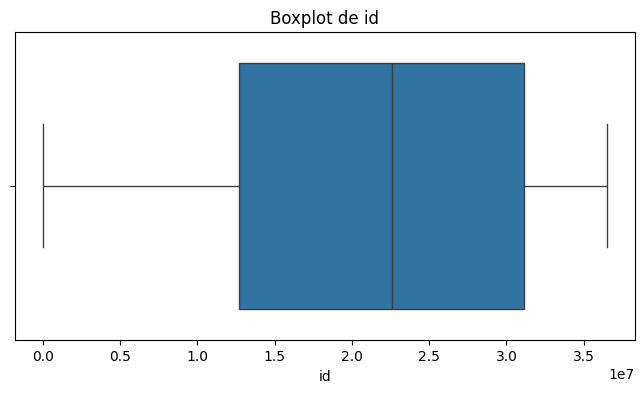

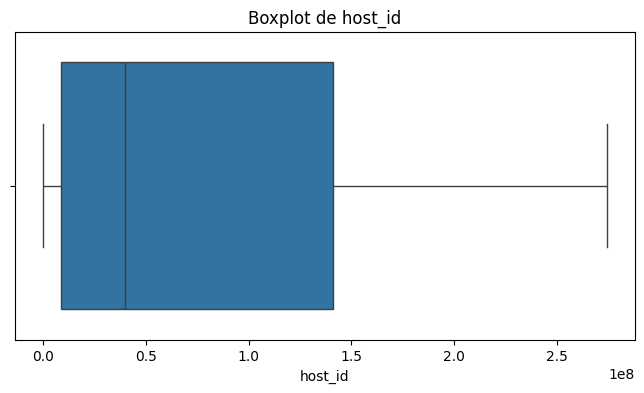

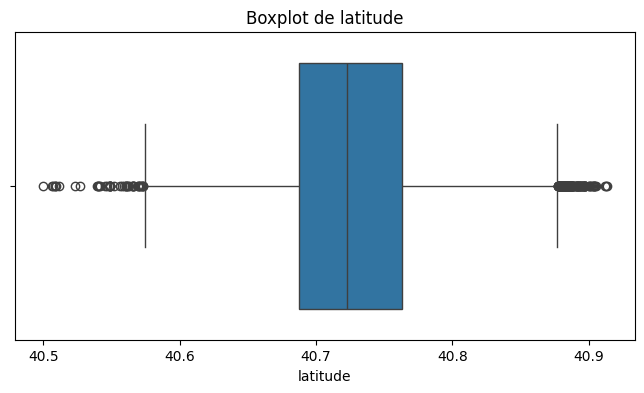

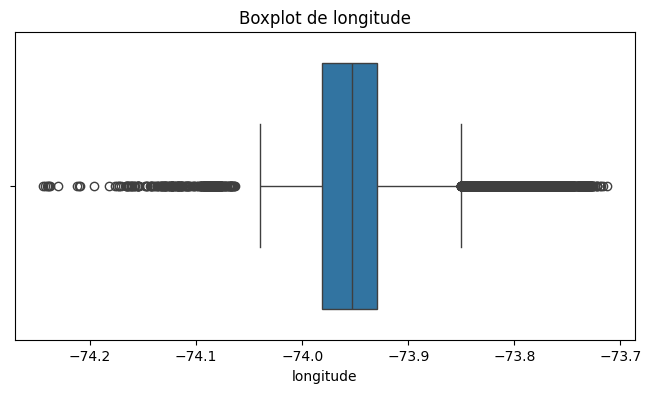

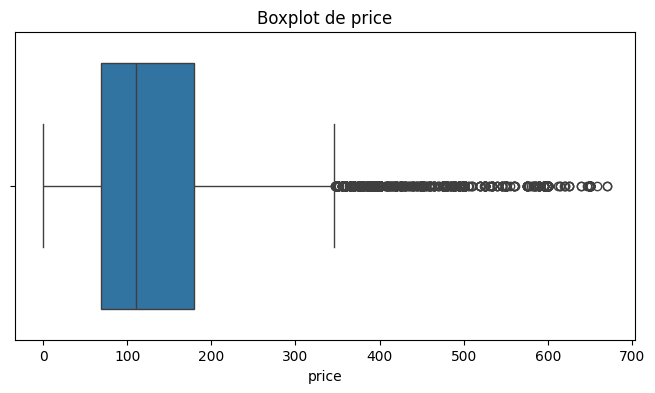

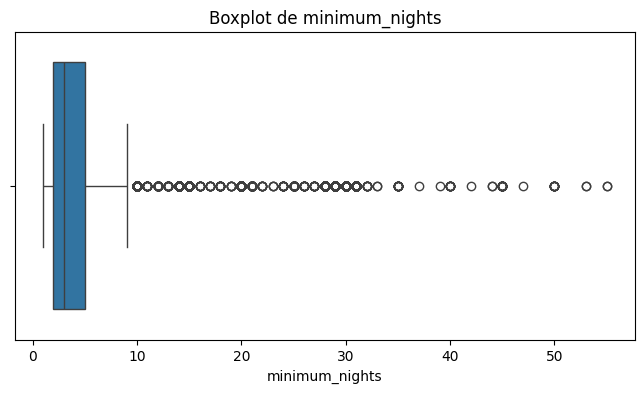

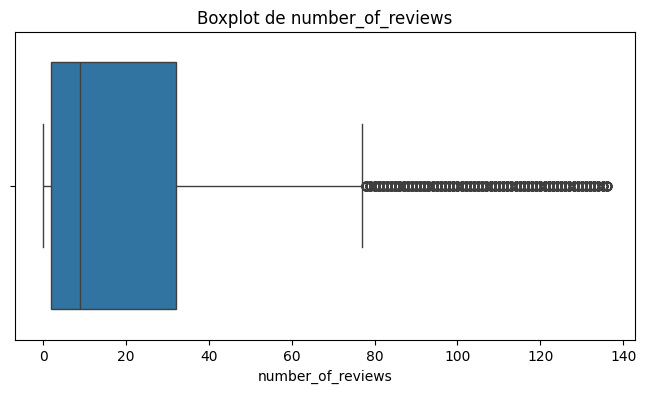

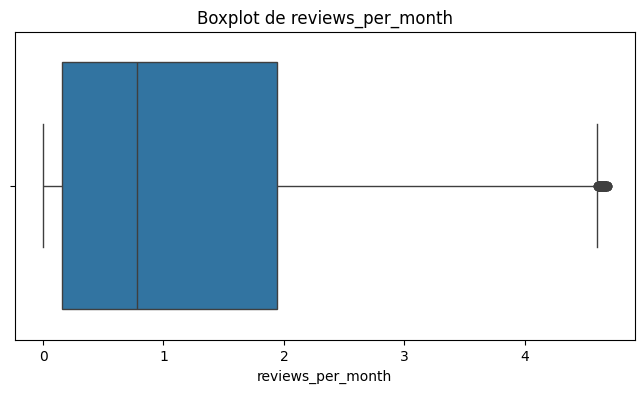

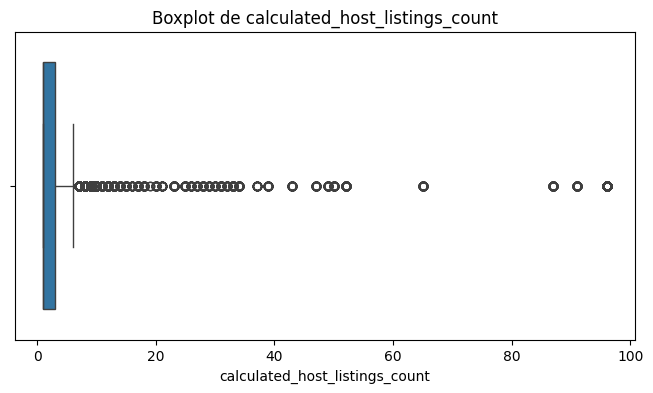

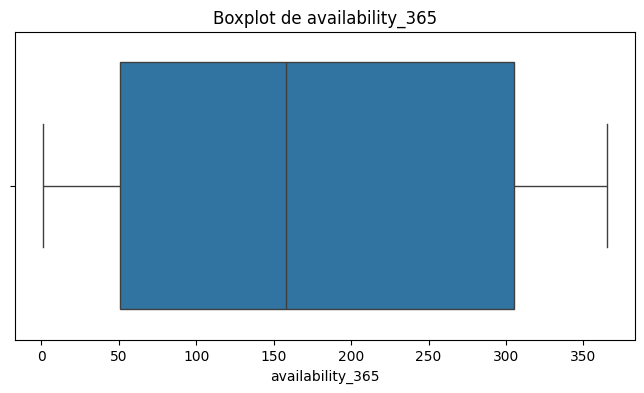

In [25]:
# Boxplot para cada columna después del filtrado de outliers
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

In [26]:
#### Transformación de las variables ‘neighbourhood_group’ y ‘room_type’ a variables numericas.

# Averiguamos cuántos y cuáles son los valores distintos en neighbourhood_group y room_type
print(f"Número de valores distintos en 'neighbourhood_group': {df['neighbourhood_group'].nunique()}")
print(f"Valores únicos en 'neighbourhood_group': {df['neighbourhood_group'].unique()}")

print(f"Número de valores distintos en 'room_type': {df['room_type'].nunique()}")
print(f"Valores únicos en 'room_type': {df['room_type'].unique()}")

# Codificamos las variables categóricas ordenandolas de peor a mejor barrio/tipo de habitación
neighbourhood_group_code = {'Brooklyn':4, 'Manhattan':5, 'Queens':3, 'Bronx':1, 'Staten Island':2}
room_type_code = {'Private room': 2, 'Entire home/apt': 3, 'Shared room': 1}

# Reemplazamos la columna mapeando las observaciones con la etiqueta asignada
df['neighbourhood_group'] = df['neighbourhood_group'].map(neighbourhood_group_code)
df['room_type'] = df['room_type'].map(room_type_code)

print(f"Valores únicos en 'neighbourhood_group': {df['neighbourhood_group'].unique()}")
print(f"Valores únicos en 'room_type': {df['room_type'].unique()}")



Número de valores distintos en 'neighbourhood_group': 5
Valores únicos en 'neighbourhood_group': ['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']
Número de valores distintos en 'room_type': 3
Valores únicos en 'room_type': ['Private room' 'Entire home/apt' 'Shared room']
Valores únicos en 'neighbourhood_group': [4 5 3 1 2]
Valores únicos en 'room_type': [2 3 1]


In [27]:
#### Con la ayuda de los comandos groupby y join o merge, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna offer group

#usamos la función groupby para contar la cantidad de oferentes en cada neighbourhood

offer_group = df.groupby(by='neighbourhood_group')['host_id'].count().reset_index() 

#renombramos la variable
offer_group = offer_group.rename(columns={'host_id': 'offer_group'}) 
print(offer_group)

# hacemos un merge con el dataframe original para agregar la columna de offer_group
df = df.merge(offer_group, on='neighbourhood_group', how='left')

   neighbourhood_group  offer_group
0                    1          812
1                    2          292
2                    3         3679
3                    4        10875
4                    5        11063


### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación.

In [30]:
#PROVISORIAMENTE borramos los missing de price
df_clean = df[['neighbourhood_group', 'latitude', 'longitude', 'room_type', 'price', 
               'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
               'calculated_host_listings_count', 'availability_365']].dropna()

#Las variables que originalmente eran categóricas ya fueron transformadas a numéricas y se incluirán de esta manera

#Creamos la matriz de correlación de las variables
corr_spearman = df_clean.corr(method='spearman')
#print(corr_spearman)

# Decidimos usar el método de Spearman para las correlaciones debido a que la mayoría de los datos son discretos y ordinales.

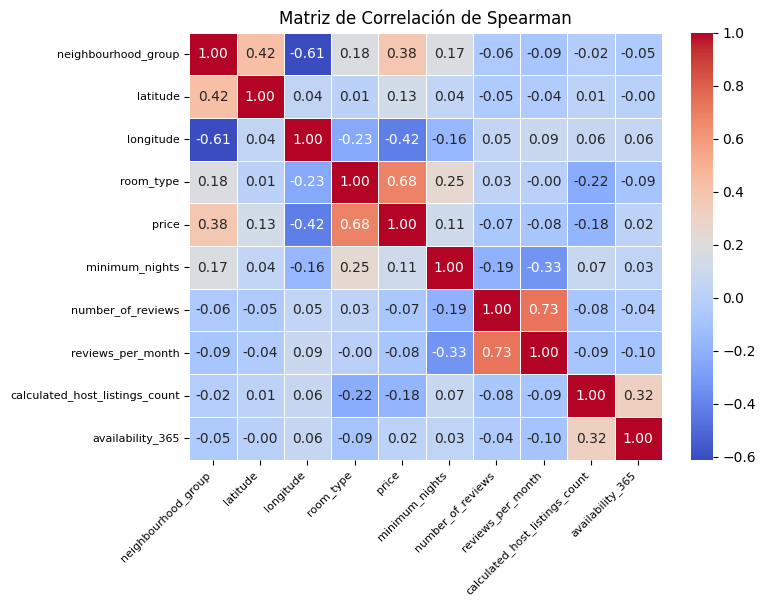

In [31]:
#Graficamos la matriz de correlación usando matplotlib

plt.figure(figsize=(8,6))
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.title('Matriz de Correlación de Spearman')
plt.show()



#### Sobre la matriz de correlación
- Correlación entre reviews_per_month y number_of_reviews (0.55): se observa una correlación positiva y fuerte entre el número de reseñas por mes y el número total de reseñas, que responde a colinealidad entre estas dos variables que se da por su construcción.
- Correlación entre price y room_type (0.52): dado que la variable de tipo de habitación fue ordenada de peor a mejor tiene sentido que observemos una correlación positiva y fuerte entre el precio y esta variable categórica.
- Correlación entre calculated_host_listings_count y minimum_nights (0.46): hay una relación positiva entre la cantidad de publicaciones de un host y la cantidad mínima de noches que requiere para alquilar. Esto podría responder a una necesidad de minimizar el número de gestiones (como por ejemplo check-in/check-out) a medida que aumenta el número de propiedades administradas en Airbnb.
- Correlación entre price y neighbourhood_group (0.29): nuevamente, dado que la variable de vecindario fue ordenada de peor a mejor, también tiene sentido encontrar una correlación positiva, aunque menos fuerte que con room_type, entre el precio del alojamiento y el vecindario en el que está ubicado.
- Correlación entre reviews_per_month y minimum_nights (-0.33): la correlación entre la cantidad de reseñas por mes y cantidad mínima de noches es negativa. Esto podría dar cuenta de que a medida que aumenta el requisito de cantidad mínima de noches, el flujo de gente que ingresa al alojamiento por mes es menor y por ende también lo serán la cantidad de reseñas.

#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

In [36]:
#Creamos dentro del data frame que usamos para crear offer_group una columna adicional que representa la proporción
offer_group['offer_group_percent'] = (offer_group['offer_group'] / offer_group['offer_group'].sum()) * 100
#print(offer_group)

#Creamos un nuevo data frame para registrar la proporción de oferentes según tipo de habitación

#Usamos la función groupby para contar la cantidad de oferentes según tipo de habitación
offer_room = df.groupby(by='room_type')['host_id'].count().reset_index() 

#Renombramos la variable
offer_room = offer_room.rename(columns={'host_id': 'offer_room'}) 

#Creamos dentro del data frame que usamos para crear offer_room una columna adicional que representa la proporción
offer_room['offer_room_percent'] = (offer_room['offer_room'] / offer_room['offer_room'].sum()) * 100
#print(offer_room)


In [41]:
#Queremos reemplazar los números por las etiquetas

neighbourhood_group_code = {4:'Brooklyn', 5:'Manhattan', 3:'Queens', 1:'Bronx', 2:'Staten Island'}
room_type_code = { 2:'Private room', 3:'Entire home/apt',  1:'Shared room'}

# Reemplazamos la columna mapeando las observaciones con la etiqueta asignada
offer_group['neighbourhood'] = offer_group['neighbourhood_group'].map(neighbourhood_group_code)
offer_room['room'] = offer_room['room_type'].map(room_type_code)
#print(offer_room)
#print(offer_group)

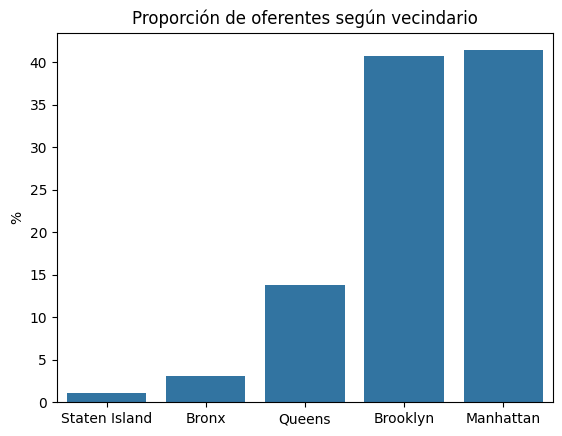

In [42]:
#Hacemos el gráfico de barras para la proporción de oferentes según vecindario
sns.barplot(x='neighbourhood', y='offer_group_percent', data=offer_group, order=offer_group.sort_values('offer_group_percent')['neighbourhood'])
plt.xlabel('')
plt.ylabel('%')
plt.title('Proporción de oferentes según vecindario')
plt.show()

Hay más gente ofreciendo alojamientos en Manhattan y Brooklyn por Airbnb que en Staten Island y Bronx.


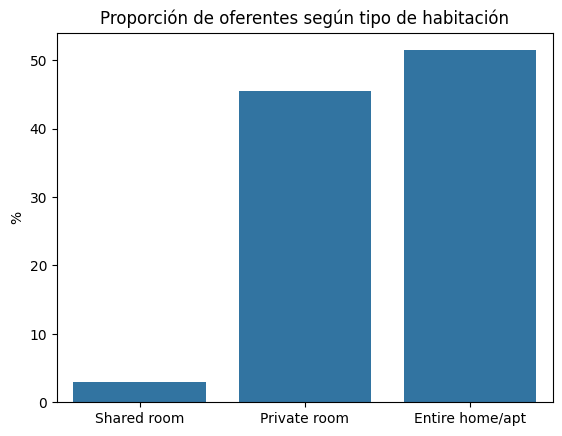

In [48]:
#Hacemos el gráfico de barras para proporción de oferentes según tipo de habitación
sns.barplot(x='room', y='offer_room_percent', data=offer_room, order=offer_room.sort_values('offer_room_percent')['room'])
plt.xlabel('')
plt.ylabel('%')
plt.title('Proporción de oferentes según tipo de habitación')
plt.show()

Hay muy pocos oferentes que publiquen habitaciones compartidas en Airbnb, la mayoría publica habitaciones privadas o casas y apartamentos enteros. 

#### Ejercicio 4
Realicen un histograma de los precios de los alojamientos. Comenten el gráfico obtenido. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación? 

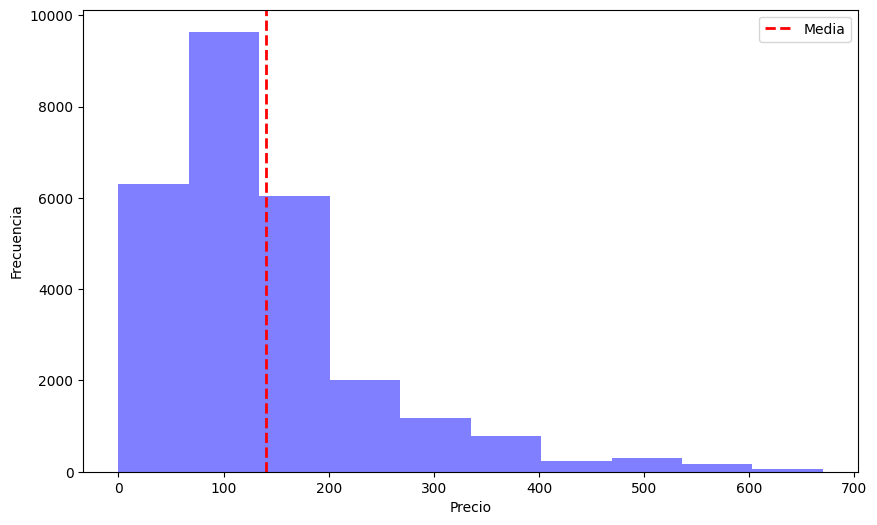

In [52]:
import numpy as np
mean_price = df['price'].mean() #calculamos el precio promedio

#Hacemos un histograma con los precios de los alojamientos
plt.figure(figsize=(10,6))
plt.hist(df['price'], alpha=0.5, color='blue') # por default, 10 bins
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.legend()
plt.show()

Tenemos como resultado una distribución asimétrica hacia la derecha, con precios que se concentran en valores menores a 200 dólares por noche.

In [55]:
print('El precio promedio de los alojamientos es:', mean_price)
print('El precio mínimo de los alojamientos es:', df['price'].min())
print('El precio máximo de los alojamientos es:', df['price'].max())

print('El precio promedio para los alojamientos en Bronx es:', df[df['neighbourhood_group'] == 1]['price'].mean())
print('El precio promedio para los alojamientos en Staten Island es:', df[df['neighbourhood_group'] == 2]['price'].mean())
print('El precio promedio para los alojamientos en Queens es:', df[df['neighbourhood_group'] == 3]['price'].mean())
print('El precio promedio para los alojamientos en Brooklyn es:', df[df['neighbourhood_group'] == 4]['price'].mean())
print('El precio promedio para los alojamientos en Manhattan es:', df[df['neighbourhood_group'] == 5]['price'].mean())

print('El precio promedio para los alojamientos de habitación compartida es:', df[df['room_type'] == 1]['price'].mean())
print('El precio promedio para los alojamientos de habitación privada es:', df[df['room_type'] == 2]['price'].mean())
print('El precio promedio para los alojamientos de casa o departamento completo es:', df[df['room_type'] == 3]['price'].mean())




El precio promedio de los alojamientos es: 140.5831368586505
El precio mínimo de los alojamientos es: 0.0
El precio máximo de los alojamientos es: 670.0
El precio promedio para los alojamientos en Bronx es: 85.4088669950739
El precio promedio para los alojamientos en Staten Island es: 93.01712328767124
El precio promedio para los alojamientos en Queens es: 98.0187550964936
El precio promedio para los alojamientos en Brooklyn es: 122.88183908045977
El precio promedio para los alojamientos en Manhattan es: 177.44355057398536
El precio promedio para los alojamientos de habitación compartida es: 61.48327137546468
El precio promedio para los alojamientos de habitación privada es: 85.98233070348455
El precio promedio para los alojamientos de casa o departamento completo es: 193.55972646588097


#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

In [58]:
## Checkeo valores minimos y maximos
print(df['calculated_host_listings_count'].min())
print(df['price'].min())
print(df['minimum_nights'].min())

1
0.0
1


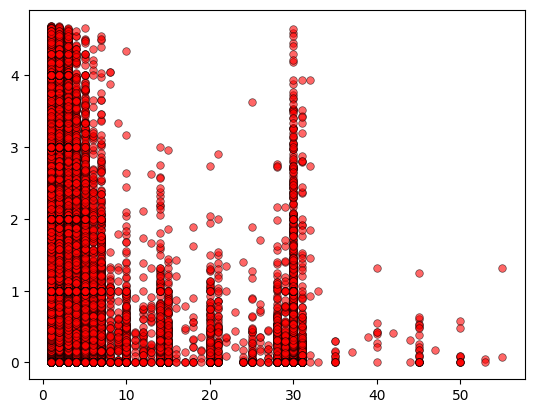

In [60]:
# Scatter plot entre ...
plt.scatter(df['minimum_nights'], df['reviews_per_month'], s=30, c='red', marker='o', alpha=0.6, linewidths=0.5, edgecolors='black')
plt.show()


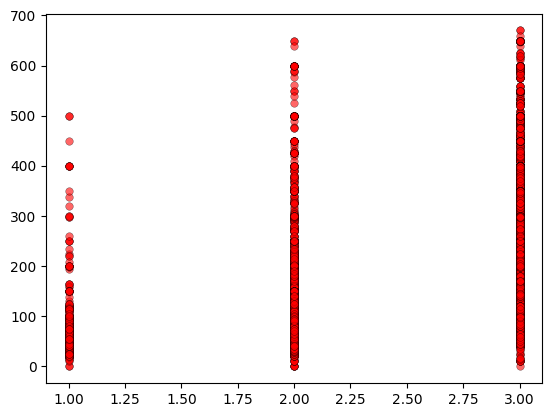

In [62]:
# Scatter plot entre ...  
plt.scatter(df['room_type'], df['price'], s=30, c='red', marker='o', alpha=0.6, linewidths=0.3, edgecolors='black')
plt.show()


#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las variables en dos dimensiones. Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

In [67]:
print(df_clean.isnull().sum()) #No hay missings en nuestras variables

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


In [71]:
print(df_clean.describe())

       neighbourhood_group      latitude     longitude     room_type  \
count         26721.000000  26721.000000  26721.000000  26721.000000   
mean              4.163317     40.727805    -73.947774      2.484226   
std               0.917749      0.057525      0.051120      0.556924   
min               1.000000     40.499790    -74.244420      1.000000   
25%               4.000000     40.687540    -73.981800      2.000000   
50%               4.000000     40.722560    -73.953230      3.000000   
75%               5.000000     40.763330    -73.929300      3.000000   
max               5.000000     40.913060    -73.712990      3.000000   

              price  minimum_nights  number_of_reviews  reviews_per_month  \
count  26721.000000    26721.000000       26721.000000       26721.000000   
mean     140.583137        6.782418          22.518020           1.173032   
std      102.300903        9.606816          30.285844           1.203945   
min        0.000000        1.000000        

In [75]:
# creando un nuevo DataFrame con las columnas originales y los datos transformados.
df_clean_transformed = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)

# Verificamos que la media de cada columna sea cercana a 0 (como resultado de la estandarización)
#print("Medias después de la estandarización:\n", df_clean_transformed.mean())
#print("Medias después de la estandarización:\n", np.allclose(df_clean_transformed.mean(), 0, atol=1e-6))

# Verificamos que la desviación estándar de cada columna sea cercana a 1 (como resultado de la estandarización)
print("Desviaciones estándar después de la estandarización:\n", df_clean_transformed.std())

#Verificamos que la media de cada columna es cero y la desviación estándar es 1, aproximadamente, como resultado de la estandarización.

Medias después de la estandarización:
 True
Desviaciones estándar después de la estandarización:
 neighbourhood_group               1.000019
latitude                          1.000019
longitude                         1.000019
room_type                         1.000019
price                             1.000019
minimum_nights                    1.000019
number_of_reviews                 1.000019
reviews_per_month                 1.000019
calculated_host_listings_count    1.000019
availability_365                  1.000019
dtype: float64


In [65]:
from sklearn.preprocessing import StandardScaler #importamos el paquete para reescalar las variables

# Escalamos las variables
# Inicializamos el transformador
scaler = StandardScaler(with_std=True, with_mean=True)
# Aplicamos fit_transform al DataFrame
df_clean_transformed = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
print(df_clean_transformed.mean()) # luego de la estandarización la media es cero
print(df_clean_transformed.std()) # la desviación estandar es uno

neighbourhood_group              -6.541429e-17
latitude                         -6.222600e-15
longitude                        -8.255176e-14
room_type                        -1.951792e-16
price                            -5.637329e-17
minimum_nights                    2.340023e-17
number_of_reviews                -9.360093e-17
reviews_per_month                -1.191285e-16
calculated_host_listings_count   -2.127294e-17
availability_365                  4.041858e-17
dtype: float64
neighbourhood_group               1.000019
latitude                          1.000019
longitude                         1.000019
room_type                         1.000019
price                             1.000019
minimum_nights                    1.000019
number_of_reviews                 1.000019
reviews_per_month                 1.000019
calculated_host_listings_count    1.000019
availability_365                  1.000019
dtype: float64


In [ ]:
# PCA

### Parte III: Predicción

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 7
Eliminen de la base todas las variables relacionadas al precio

In [ ]:
# Resolver acá


#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [ ]:
# Resolver acá


#### Ejercicio 9
Implementen una regresión lineal y comenten los resultados obtenidos.

In [ ]:
# Resolver acá
